In [ ]:
pip install spark

Python interpreter will be restarted.
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58763 sha256=05f1b5c64b33e762bf475d3a8811b3743e6c7c15b6c57379ba87af64e7a72d1b
  Stored in directory: /root/.cache/pip/wheels/bc/0f/6c/b41528ca0fd4d46513185e90da91bc1c484bba6138641c5a62
Successfully built spark
Python interpreter will be restarted.


In [ ]:
pip install mlflow

Python interpreter will be restarted.
  Using cached zipp-3.17.0-py3-none-any.whl (7.4 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Not uninstalling typing-extensions at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-3fe4caa4-3d92-465e-bd87-7b385ad3c521
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Not uninstalling markupsafe at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-3fe4caa4-3d92-465e-bd87-7b385ad3c521
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/e

In [ ]:
import numpy as np
import pandas as pd
import matplotlib #
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn #
import spark
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,plot_roc_curve, confusion_matrix
from sklearn.model_selection import KFold
import mlflow

In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("AppHiba").getOrCreate()

# File location and type
file_location = "/FileStore/tables/creditcard.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# Read CSV file into Spark DataFrame
dataframe = spark.read.format(file_type) \
    .option("inferSchema", infer_schema) \
    .option("header", first_row_is_header) \
    .option("sep", delimiter) \
    .load(file_location)

# Show the first few rows of the Spark DataFrame
dataframe.show()

# Convert Spark DataFrame to Pandas DataFrame
df = dataframe.toPandas()


+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|                V3|                 V4|                 V5|                 V6|                  V7|                 V8|                V9|                V10|               V11|               V12|                V13|                V14|                V15|                V16|                 V17|                V18|                V19|                V20|                 V

In [ ]:
df = df.drop("Time", axis=1) # cette colonne n'apporte rien à notre analyse 
df.head()
  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Out[4]: <AxesSubplot:xlabel='Class', ylabel='count'>

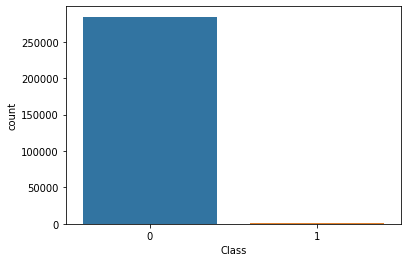

In [ ]:
sns.countplot(x='Class',data=df)

In [ ]:
normal = df[df.Class == 0].sample(frac=0.5,random_state=2020).reset_index(drop=True)
anomaly = df[df.Class == 1]

In [ ]:
print(f"Normal: {normal.shape}")
print(f"Anomaly: {anomaly.shape}")

Normal: (142158, 30)
Anomaly: (492, 30)


In [ ]:
normal_train, normal_test = train_test_split(normal,test_size = 0.2, random_state = 2020)
anomaly_train, anomaly_test = train_test_split(anomaly, test_size = 0.2, random_state = 2020)
normal_train, normal_validate = train_test_split(normal_train,test_size = 0.25, random_state = 2020)
anomaly_train, anomaly_validate = train_test_split(anomaly_train, test_size = 0.25, random_state = 2020)

In [ ]:
x_train = pd.concat((normal_train, anomaly_train))
x_test = pd.concat((normal_test, anomaly_test))
x_validate = pd.concat((normal_validate, anomaly_validate))

In [ ]:
y_train = np.array(x_train["Class"])
y_test = np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])

In [ ]:
x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)
x_validate = x_validate.drop("Class", axis=1)

In [ ]:
print("Training sets:\nx_train: {} \ny_train:{}".format(x_train.shape, y_train.shape))
print("\nTesting sets:\nx_test: {} \ny_test:{}".format(x_test.shape, y_test.shape))
print("\nValidation sets:\nx_validate: {} \ny_validate: {}".format(x_validate.shape, y_validate.shape))

Training sets:
x_train: (85588, 29) 
y_train:(85588,)

Testing sets:
x_test: (28531, 29) 
y_test:(28531,)

Validation sets:
x_validate: (28531, 29) 
y_validate: (28531,)


In [ ]:
scaler = StandardScaler()
scaler.fit(pd.concat((normal, anomaly)).drop("Class", axis=1))

Out[12]: StandardScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

In [ ]:
def train(sk_model, x_train, y_train):
    sk_model = sk_model.fit(x_train, y_train)
    train_acc = sk_model.score(x_train, y_train)
    mlflow.log_metric("train_acc", train_acc)
    print(f"Train Accuracy: {train_acc:.3%}")

In [ ]:
def evaluate(sk_model, x_test, y_test):
    eval_acc = sk_model.score(x_test, y_test)
    preds = sk_model.predict(x_test)
    auc_score = roc_auc_score(y_test, preds)
    mlflow.log_metric("eval_acc", eval_acc) # nous avons fait la même chose pour l'accuracy de test (evaluation)
    mlflow.log_metric("auc_score", auc_score)# aussi pour l'AUC score 
    print(f"Auc Score: {auc_score:.3%}")
    print(f"Eval Accuracy: {eval_acc:.3%}")
    roc_plot = plot_roc_curve(sk_model, x_test, y_test,name='Scikit-learn ROC Curve')
    plt.savefig("sklearn_roc_plot.png")
    plt.show()
    plt.clf()
    conf_matrix = confusion_matrix(y_test, preds)
    ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")
    plt.savefig("sklearn_conf_matrix.png")
    # nous avons dit à MLflow de sauvegarder ces deux figure afin de les consulter à chaque 
    # exécution d'une façon organisée comme nous allons le voir plus loin dans cet atelier  
    mlflow.log_artifact("sklearn_roc_plot.png")
    mlflow.log_artifact("sklearn_conf_matrix.png")

In [ ]:
#to configure your DataBricks CLI
token = dbutils.notebook.entry_point.getDbutils().notebook().getContext().apiToken().get()
dbutils.fs.put("file:///root/.databrickscfg","[DEFAULT]\nhost=https://community.cloud.databricks.com\ntoken ="+token,overwrite=True)

Wrote 97 bytes.
Out[16]: True

/databricks/python/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Train Accuracy: 99.893%
Auc Score: 85.341%
Eval Accuracy: 99.874%


/databricks/python/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


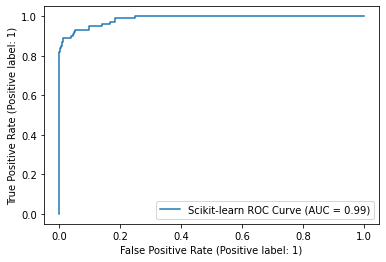

2024/01/07 19:34:28 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.9.2/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.
/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Model run:  1a0cd26ac6c6439c9b41c49b35341634


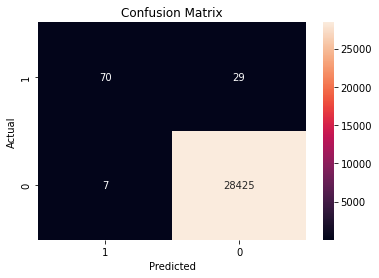

In [ ]:
sk_model = LogisticRegression(random_state=None,max_iter=10, solver='newton-cg')
mlflow.set_experiment("/Users/Hiba.KHEY@um6p.ma/scikit_learn_experiment10")
with mlflow.start_run():
    train(sk_model, x_train, y_train)
    evaluate(sk_model, x_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

/databricks/python/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
630 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/databricks/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/databricks/python/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    ra

Train Accuracy: 99.893%
Auc Score: 85.341%
Eval Accuracy: 99.874%


/databricks/python/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


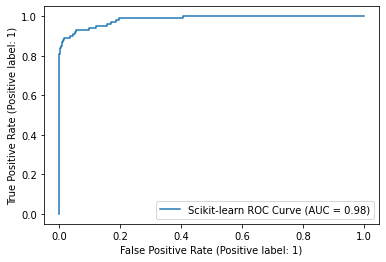

2024/01/07 20:58:53 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.9.2/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Model run:  ab7404bb8a064605ab00ba78526e3196


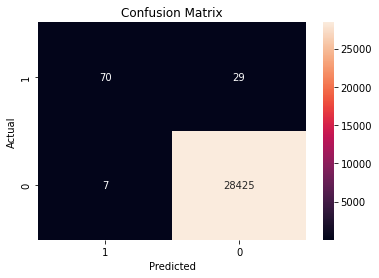

In [ ]:

# define evaluation

# define search space
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
# summarize result
#print('Best Score: %s' % result.best_score_)
#print('Best Hyperparameters: %s' % result.best_params_)

model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1, 10)
mlflow.set_experiment("/Users/Hiba.KHEY@um6p.ma/scikit_learn_experiment10")
with mlflow.start_run():
    search = RandomizedSearchCV(model, space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
    sk_model = search.fit(x_train, y_train)
    train(sk_model, x_train, y_train)
    evaluate(sk_model, x_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

In [ ]:
all_runs = mlflow.search_runs(max_results=10)  
display(all_runs)

run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.auc_score,metrics.eval_acc,metrics.train_acc,tags.mlflow.databricks.cluster.id,tags.mlflow.databricks.notebookRevisionID,tags.mlflow.user,tags.mlflow.databricks.workspaceID,tags.mlflow.databricks.workspaceURL,tags.mlflow.databricks.notebookPath,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.databricks.notebookID,tags.mlflow.source.type,tags.mlflow.databricks.cluster.info,tags.mlflow.databricks.notebook.commandID,tags.mlflow.databricks.webappURL,tags.mlflow.databricks.cluster.libraries,tags.mlflow.log-model.history
ee2f053182f842d999bfdfc76f806556,2625494308674263,FAILED,dbfs:/databricks/mlflow-tracking/2625494308674263/ee2f053182f842d999bfdfc76f806556/artifacts,2024-01-07T19:34:32.917+0000,2024-01-07T19:54:33.994+0000,null,null,null,0107-192230-a8abk1ak,1704657274237,Hiba.KHEY@um6p.ma,6894176970319549,https://community.cloud.databricks.com,/Users/Hiba.KHEY@um6p.ma/Untitled Notebook 2024-01-07 17:18:10,/Users/Hiba.KHEY@um6p.ma/Untitled Notebook 2024-01-07 17:18:10,learned-dolphin-37,2625494308674235,NOTEBOOK,"{""cluster_name"":""My Cluster"",""spark_version"":""12.2.x-scala2.12"",""node_type_id"":""dev-tier-node"",""driver_node_type_id"":""dev-tier-node"",""autotermination_minutes"":120,""disk_spec"":{""disk_count"":0},""num_workers"":0}",7242886980379737350_5751950079008298620_20c3fc571b9441739c88899b1b36c220,https://community.cloud.databricks.com,"{""installable"":[],""redacted"":[]}",null
1a0cd26ac6c6439c9b41c49b35341634,2625494308674263,FINISHED,dbfs:/databricks/mlflow-tracking/2625494308674263/1a0cd26ac6c6439c9b41c49b35341634/artifacts,2024-01-07T19:34:25.470+0000,2024-01-07T19:34:32.296+0000,0.8534122528037835,0.9987382145736217,0.9989250829555545,0107-192230-a8abk1ak,1704656072459,Hiba.KHEY@um6p.ma,6894176970319549,https://community.cloud.databricks.com,/Users/Hiba.KHEY@um6p.ma/Untitled Notebook 2024-01-07 17:18:10,/Users/Hiba.KHEY@um6p.ma/Untitled Notebook 2024-01-07 17:18:10,redolent-asp-161,2625494308674235,NOTEBOOK,"{""cluster_name"":""My Cluster"",""spark_version"":""12.2.x-scala2.12"",""node_type_id"":""dev-tier-node"",""driver_node_type_id"":""dev-tier-node"",""autotermination_minutes"":120,""disk_spec"":{""disk_count"":0},""num_workers"":0}",7242886980379737350_6141383493755865252_4ec9c3a33df24b88bb3af4643ef3740f,https://community.cloud.databricks.com,"{""installable"":[],""redacted"":[]}","[{""artifact_path"":""log_reg_model"",""flavors"":{""python_function"":{""predict_fn"":""predict"",""model_path"":""model.pkl"",""loader_module"":""mlflow.sklearn"",""env"":{""conda"":""conda.yaml"",""virtualenv"":""python_env.yaml""},""python_version"":""3.9.5""},""sklearn"":{""pickled_model"":""model.pkl"",""sklearn_version"":""1.0.2"",""serialization_format"":""cloudpickle"",""code"":null}},""run_id"":""1a0cd26ac6c6439c9b41c49b35341634"",""model_uuid"":""7f9b64432b4b45a69473b9353e7f8608"",""model_size_bytes"":902,""utc_time_created"":""2024-01-07 19:34:28.057148"",""mlflow_version"":""2.9.2"",""databricks_runtime"":""12.2.x-scala2.12""}]"
2df7d4de5e224df3b882dbab227ec90c,2625494308674263,RUNNING,dbfs:/databricks/mlflow-tracking/2625494308674263/2df7d4de5e224df3b882dbab227ec90c/artifacts,2024-01-07T16:38:50.740+0000,null,null,null,null,0107-161849-hsyjxg5p,null,Hiba.KHEY@um6p.ma,6894176970319549,https://community.cloud.databricks.com,/Users/Hiba.KHEY@um6p.ma/Untitled Notebook 2024-01-07 17:18:10,/Users/Hiba.KHEY@um6p.ma/Untitled Notebook 2024-01-07 17:18:10,crawling-elk-180,2625494308674235,NOTEBOOK,"{""cluster_name"":""My Cluster"",""spark_version"":""12.2.x-scala2.12"",""node_type_id"":""dev-tier-node"",""driver_node_type_id"":""dev-tier-node"",""autotermination_minutes"":120,""disk_spec"":{""disk_count"":0},""num_workers"":0}",7241135956740175419_5276067649656334512_d327487be27f4c4d8b018e80966e7700,https://community.cloud.databricks.com,"{""installable"":[],""redacted"":[]}",null
f499adc0f2a94c3f956b12b70005f5cc,2625494308674263,FINISHED,dbfs:/d

Train Accuracy: 100.000%
Auc Score: 88.880%
Eval Accuracy: 99.905%


/databricks/python/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


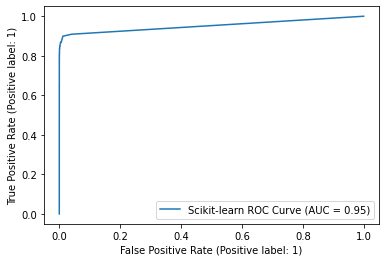

2024/01/07 19:55:53 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.9.2/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Model run:  afd52341be514acf896ff94709e1c02e


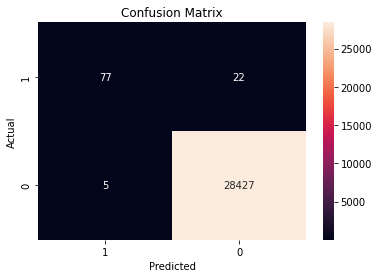

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=2020)
mlflow.set_experiment("/Users/Hiba.KHEY@um6p.ma/scikit_learn_experiment10")

with mlflow.start_run():
    train(rf_model, x_train, y_train)
    evaluate(rf_model, x_test, y_test)
    mlflow.sklearn.log_model(rf_model, "random_forest_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()
